In [1]:
ukraineMapsLink="https://github.com/Joaquin-TC/geodfprepro/raw/main/maps%20and%20data/UcraniaMapa.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(ukraineMapsLink)

['ucrania', 'regiones', 'ciudades', 'capitales', 'hidrografia']

In [2]:
# reading in the data:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

ucrania=gpd.read_file(ukraineMapsLink,layer='ucrania')
regiones=gpd.read_file(ukraineMapsLink,layer='regiones')
ciudades=gpd.read_file(ukraineMapsLink,layer='ciudades')
capitales=gpd.read_file(ukraineMapsLink,layer='capitales')
hidrografia=gpd.read_file(ukraineMapsLink,layer='hidrografia')

In [3]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
#Cambiamos el nombre de las columnas
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports.rename(columns={'Country Code':'CountryCode'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'CountryCode','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   portName     3774 non-null   object 
 1   CountryCode  3774 non-null   object 
 2   Latitude     3774 non-null   float64
 3   Longitude    3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [5]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)# notice it is unprojected

seaports_ukr=seaports[seaports['CountryCode']=='Ukraine'].copy()

seaports_ukr.reset_index(drop=True, inplace=True)

seaports_ukr_6381=seaports_ukr.to_crs(6381) # projected crs

In [6]:
#Observamos que Ukraina tiene puertos marinos
seaports[seaports.CountryCode=='Ukraine']

,portName,CountryCode,Latitude,Longitude,geometry
39,Kyrylivka,Ukraine,46.350000,35.366667,POINT (35.36667 46.35000)
57,Henichesk,Ukraine,46.166667,34.816667,POINT (34.81667 46.16667)
92,Balaklava,Ukraine,44.500000,33.600000,POINT (33.60000 44.50000)
93,Alushta,Ukraine,44.683333,34.416667,POINT (34.41667 44.68333)
183,Sudak,Ukraine,44.850000,34.983333,POINT (34.98333 44.85000)
425,Ust-Dunaisk,Ukraine,45.466667,29.700000,POINT (29.70000 45.46667)
1104,Mariupol,Ukraine,47.083333,37.566667,POINT (37.56667 47.08333)
1105,Berdyansk,Ukraine,46.750000,36.783333,POINT (36.78333 46.75000)
1148,Mykolayiv,Ukraine,46.950000,31.983333,POINT (31.98333 46.95000)
1180,Izmayil,Ukraine,45.333333,28.850000,POINT (28.85000 45.33333)


In [7]:
infoairports=pd.read_csv(os.path.join("data","ua-airports.csv"))

#al igual que el otro caso, este también tiene muchas columnas
infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [8]:
#Cambiaremos el nombre de las columnas y solo nos quedaremos con algunas
#Cambiamos el nombre de las columnas
infoairports.rename(columns={'name':'airportName'},inplace=True)
infoairports.rename(columns={'country_name':'Country'},inplace=True)
infoairports=infoairports.loc[:,['airportName', 'Country','latitude_deg', 'longitude_deg']]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   airportName    247 non-null    object 
 1   Country        247 non-null    object 
 2   latitude_deg   247 non-null    float64
 3   longitude_deg  247 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [9]:
infoairports

,airportName,Country,latitude_deg,longitude_deg
0,Boryspil International Airport,Ukraine,50.345001,30.894699
1,Ihor Sikorsky Kyiv International Airport (Zhul...,Ukraine,50.401940,30.451940
2,Odessa International Airport,Ukraine,46.426800,30.676500
3,Lviv International Airport,Ukraine,49.812500,23.956100
4,Simferopol International Airport,Ukraine,45.052200,33.975101
...,...,...,...,...
242,Oreanda Heliport,Ukraine,44.451300,34.129300
243,Pension Wisteria Helipad,Ukraine,44.461824,34.145346
244,Massandra Palace Heliport,Ukraine,44.514500,34.203900
245,Artek Heliport,Ukraine,44.560590,34.307563


In [13]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)

airports_ukr=airports[airports['Country']=='Ukraine'].copy()

airports_ukr.reset_index(drop=True, inplace=True)

airports_ukr_6381=airports_ukr.to_crs(6381) 
airports_ukr_6381


,airportName,Country,latitude_deg,longitude_deg,geometry
0,Boryspil International Airport,Ukraine,50.345001,30.894699,POINT (1003781.802 5626341.710)
1,Ihor Sikorsky Kyiv International Airport (Zhul...,Ukraine,50.401940,30.451940,POINT (971541.639 5628534.004)
2,Odessa International Airport,Ukraine,46.426800,30.676500,POINT (1043729.138 5189358.444)
3,Lviv International Airport,Ukraine,49.812500,23.956100,POINT (512870.058 5524313.763)
4,Simferopol International Airport,Ukraine,45.052200,33.975101,POINT (1322174.059 5073484.910)
...,...,...,...,...,...
242,Oreanda Heliport,Ukraine,44.451300,34.129300,POINT (1345282.698 5008706.266)
243,Pension Wisteria Helipad,Ukraine,44.461824,34.145346,POINT (1346368.815 5010084.753)
244,Massandra Palace Heliport,Ukraine,44.514500,34.203900,POINT (1350066.889 5016703.423)
245,Artek Heliport,Ukraine,44.560590,34.307563,POINT (1357460.435 5023187.276)


In [14]:
seaports_ukr_6381

,portName,CountryCode,Latitude,Longitude,geometry
0,Kyrylivka,Ukraine,46.350000,35.366667,POINT (1405336.698 5236418.258)
1,Henichesk,Ukraine,46.166667,34.816667,POINT (1366695.030 5208397.526)
2,Balaklava,Ukraine,44.500000,33.600000,POINT (1302296.116 5007378.718)
3,Alushta,Ukraine,44.683333,34.416667,POINT (1363843.500 5038272.413)
4,Sudak,Ukraine,44.850000,34.983333,POINT (1405518.784 5064492.300)
5,Ust-Dunaisk,Ukraine,45.466667,29.700000,POINT (980454.487 5073894.209)
6,Mariupol,Ukraine,47.083333,37.566667,POINT (1556680.337 5351496.468)
7,Berdyansk,Ukraine,46.750000,36.783333,POINT (1505041.032 5301969.521)
8,Mykolayiv,Ukraine,46.950000,31.983333,POINT (1135883.406 5260702.436)
9,Izmayil,Ukraine,45.333333,28.850000,POINT (915449.001 5052187.180)


<Axes: >

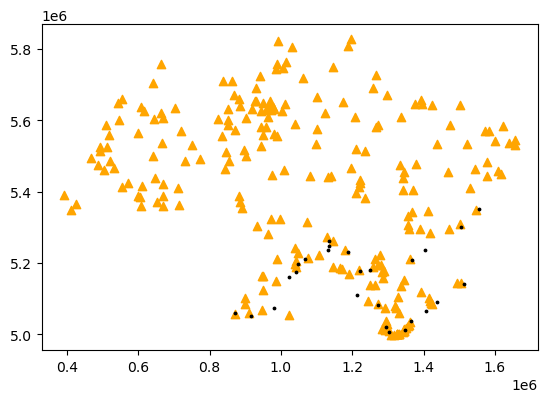

In [15]:
#plotting
base=airports_ukr_6381.plot(color='orange',marker="^")
seaports_ukr_6381.plot(ax=base,color='black', alpha=1,markersize=3)

In [16]:
seaports_ukr_6381.head()

,portName,CountryCode,Latitude,Longitude,geometry
0,Kyrylivka,Ukraine,46.350000,35.366667,POINT (1405336.698 5236418.258)
1,Henichesk,Ukraine,46.166667,34.816667,POINT (1366695.030 5208397.526)
2,Balaklava,Ukraine,44.500000,33.600000,POINT (1302296.116 5007378.718)
3,Alushta,Ukraine,44.683333,34.416667,POINT (1363843.500 5038272.413)
4,Sudak,Ukraine,44.850000,34.983333,POINT (1405518.784 5064492.300)


In [17]:
#Ahora calcularemos la distancia entre los dos primeros puntos de los gdf en km
airports_ukr_6381.iloc[0].geometry.distance(seaports_ukr_6381.iloc[0].geometry)/1000

559.7201380700092

In [18]:
seaports_ukr_6381.geometry.apply\
(lambda g: airports_ukr_6381.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,559.720138,584.750298,364.656898,937.752912,182.929769,227.246018,409.397491,1023.660366,266.553605,745.648829,...,247.426723,247.845160,249.109343,248.764635,248.119164,235.497844,233.889005,226.559839,218.539672,454.950958
1,553.519063,576.767599,323.526590,910.395602,142.068754,247.832940,438.265722,990.222043,311.155029,712.969227,...,211.059080,211.270161,212.073052,211.761947,211.519416,200.835972,199.351727,192.413940,185.440326,452.378081
2,687.187007,703.727514,316.185868,943.618219,69.030148,449.708176,645.121316,986.240433,516.681170,723.768680,...,29.852960,28.314467,24.853887,25.101139,28.132493,43.007076,44.155695,48.672342,57.384776,601.692311
3,689.543273,708.737960,353.977674,979.995915,54.555131,417.379058,608.264756,1032.317910,462.281028,764.642634,...,49.986742,50.979404,53.575303,53.162646,51.297762,34.909317,33.164872,25.593287,16.380014,597.134871
4,690.700632,711.673525,382.731370,1004.120274,83.828457,395.524515,581.292953,1063.281628,422.807817,792.530034,...,98.107152,99.262658,102.148642,101.732165,99.583457,82.100351,80.367282,73.203070,63.369629,593.989387
5,552.939785,554.711403,131.664996,649.240305,341.719817,526.667305,706.678273,666.822102,685.589132,421.846951,...,358.479698,356.930368,353.409052,353.680704,356.736324,370.606383,371.436323,374.010847,380.400681,514.617503
6,617.443680,647.407980,537.966236,1058.019714,363.708153,236.797661,335.367634,1164.071298,113.044232,886.816941,...,417.270331,418.071368,420.169884,419.776937,418.379389,402.733267,400.989894,393.415175,384.025383,507.534668
7,597.057898,625.512561,474.857787,1016.779329,292.652605,222.427849,360.704170,1115.268081,166.593791,837.114371,...,348.098852,348.834568,350.793235,350.407021,349.138010,333.955180,332.225210,324.644008,315.435528,487.524883
8,388.771029,402.875016,116.543443,676.488406,264.110980,284.674718,464.467537,753.789223,456.183670,476.321122,...,325.553009,324.565310,322.524314,322.516119,324.588984,327.643302,327.281729,324.669190,324.822769,315.547682
9,580.909725,579.069983,187.807745,620.462180,407.282293,588.102706,763.480321,621.869504,751.644588,393.282042,...,419.076432,417.510465,413.927208,414.224414,417.295882,432.027310,432.971708,436.063992,442.961739,553.966593


In [19]:
seaports_ukr_6381.set_index('portName').geometry.apply\
(lambda g: airports_ukr_6381.set_index('airportName').geometry.distance(g)/1000)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [27]:
distanceMatrixKM_sea_air= seaports_ukr_6381.set_index('portName').geometry.apply\
                          (lambda g: airports_ukr_6381.geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [28]:
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Mykolayiv               372.892895
Port Oktyabrsk          376.172623
Dnipro-Buzkyy           379.317965
Kherson                 384.235610
Yuzhnyy                 390.166449
Odesa                   398.740574
Skadovs'k               405.545644
Illichivsk              408.468591
Khorly                  409.781221
Belgorod-Dnestrovsky    419.408929
Chornomors Ke           434.779477
Henichesk               444.262682
Yevpatoriya             457.736537
Kyrylivka               458.556306
Ust-Dunaisk             476.245767
Sevastopol              499.494761
Balaklava               509.657660
Izmayil                 509.668873
Berdyansk               512.995943
Alushta                 513.366295
Sudak                   521.080072
Yalta                   521.575171
Reni                    522.313310
Feodosiya               527.939146
Mariupol                548.093237
Kerch                   557.511879
dtype: float64

In [29]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats.head()

,mean,min,max
portName,,,
Alushta,513.366295,3.885283,1032.317910
Balaklava,509.657660,1.224485,993.529179
Belgorod-Dnestrovsky,419.408929,36.323691,739.484540
Berdyansk,512.995943,7.611671,1115.268081
Chornomors Ke,434.779477,35.034855,867.461151


In [30]:
distanceMatrixKM_sea_air.idxmax(axis="columns")

portName
Alushta                   7
Balaklava                44
Belgorod-Dnestrovsky    203
Berdyansk                 7
Chornomors Ke             7
Dnipro-Buzkyy             7
Feodosiya                 7
Henichesk                 7
Illichivsk              203
Izmayil                 203
Kerch                     7
Kherson                   7
Khorly                    7
Kyrylivka                 7
Mariupol                  7
Mykolayiv                 7
Odesa                   203
Port Oktyabrsk            7
Reni                    203
Sevastopol               44
Skadovs'k                 7
Sudak                     7
Ust-Dunaisk             203
Yalta                     7
Yevpatoriya               7
Yuzhnyy                   7
dtype: int64

In [31]:
# farthest seaport to each airport
distanceMatrixKM_sea_air.idxmax(axis="rows")

0         Yalta
1         Kerch
2      Mariupol
3         Kerch
4          Reni
         ...   
242        Reni
243        Reni
244        Reni
245        Reni
246       Yalta
Length: 247, dtype: object

In [32]:
# closest airport to each seaport
distanceMatrixKM_sea_air.idxmin(axis="columns")

portName
Alushta                 181
Balaklava               230
Belgorod-Dnestrovsky      2
Berdyansk                96
Chornomors Ke           209
Dnipro-Buzkyy           213
Feodosiya                26
Henichesk               188
Illichivsk                2
Izmayil                 192
Kerch                   118
Kherson                  68
Khorly                  160
Kyrylivka               188
Mariupol                 69
Mykolayiv               145
Odesa                     2
Port Oktyabrsk          145
Reni                    224
Sevastopol              228
Skadovs'k               167
Sudak                   153
Ust-Dunaisk             194
Yalta                    59
Yevpatoriya              48
Yuzhnyy                  63
dtype: int64

In [43]:
# closest seaport to each airport
distanceMatrixKM_sea_air.idxmin(axis="rows")

0        Mykolayiv
1        Mykolayiv
2            Odesa
3             Reni
4      Yevpatoriya
          ...     
242          Yalta
243          Yalta
244          Yalta
245          Yalta
246      Mykolayiv
Length: 247, dtype: object

In [34]:
hidrografia

,NOMBRE,geometry
0,San,"MULTILINESTRING ((-238915.129 5477644.045, -23..."
1,Dniester,"MULTILINESTRING ((-235855.759 5496822.186, -23..."
2,Prut,"MULTILINESTRING ((-127633.636 5362417.577, -12..."
3,Siret,"LINESTRING (-18363.591 5337838.709, -18388.160..."
4,Danubio,"MULTILINESTRING ((126427.190 5046636.385, 1274..."
5,Ingulets,"LINESTRING (486159.208 5170822.916, 486211.656..."
6,Psel,"LINESTRING (540640.202 5429729.360, 540597.725..."
7,Desna,"LINESTRING (328017.807 5602474.525, 328127.332..."
8,Seym,"LINESTRING (469806.042 5701047.583, 470394.586..."
9,Dnieper,"MULTILINESTRING ((455045.586 5152739.659, 4549..."


In [35]:
hidrografia[hidrografia.NOMBRE.str.contains('Dniester')]

,NOMBRE,geometry
16,Oskol,"LINESTRING (825925.160 5447068.697, 825908.500..."


In [37]:
hidrografia[hidrografia.NOMBRE.str.contains('Dniester')].iloc[0].geometry.distance(airports_ukr_6381.geometry)


0      167574.755982
1      140673.288380
2      337421.319799
3      316897.769177
4      621150.396585
           ...      
242    679627.745812
243    679570.867941
244    678187.894909
245    679856.754949
246    247820.563009
Name: geometry, Length: 247, dtype: float64

In [40]:
distanceMatrixKM_riv_air=hidrografia.set_index('NOMBRE').geometry.apply\
(lambda g: airports_ukr_6381.geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
NOMBRE,,,,,,,,,,,,,,,,,,,,,
Danubio,972.878420,949.083621,820.097483,565.706164,1081.251021,1186.109070,1313.032204,391.184458,1377.245109,545.436523,...,1088.845447,1087.274048,1083.647003,1083.975157,1087.034188,1102.748956,1103.829015,1107.522034,1114.948767,1022.015096
Desna,496.476124,464.843975,755.062234,181.697853,1039.860614,872.855911,877.928204,222.334995,1060.833049,395.943939,...,1094.064193,1092.849815,1090.231591,1090.310979,1092.807798,1099.081113,1099.006228,1097.527474,1099.024691,604.156172
Dnieper,434.069967,409.895209,395.322669,47.176339,694.488464,689.338201,790.408018,103.397384,889.020633,10.958095,...,725.303718,723.809965,720.456463,720.679046,723.655386,735.623632,736.195592,737.555686,742.548168,491.077101
Dniester,860.610926,835.501551,740.346317,395.225083,1015.613933,1091.259374,1211.233818,236.943426,1285.624519,435.410864,...,1030.143950,1028.576146,1024.984250,1025.285957,1028.358005,1043.170181,1044.114319,1047.166156,1053.957388,916.173113
Goryn',939.621772,907.533042,1053.837599,451.175600,1355.406472,1284.693300,1331.652161,379.225144,1483.695818,643.891104,...,1392.720754,1391.268259,1388.028914,1388.224521,1391.135305,1402.004556,1402.435345,1403.143228,1407.338027,1035.416346
Ingulets,546.850652,519.339071,517.325156,123.528156,811.856342,822.690690,919.247978,79.870341,1022.611571,142.047653,...,839.737928,838.221928,834.803547,835.043347,838.053685,850.646364,851.293961,852.988757,858.344471,616.400226
Oskol,167.574756,140.673288,337.421320,316.897769,621.150397,499.258620,549.953558,433.388070,695.969379,178.325985,...,674.526728,673.311581,670.693939,670.772986,673.269437,679.627746,679.570868,678.187895,679.856755,247.820563
Pripyat',678.221146,645.906536,864.030551,237.353769,1161.228802,1039.556848,1068.922889,289.844734,1234.903165,463.967514,...,1208.155030,1206.816963,1203.881912,1204.016071,1206.732324,1215.204171,1215.362969,1214.882936,1217.647531,779.705999
Prut,1013.493542,982.987991,1033.261533,513.762192,1328.923689,1321.872901,1399.444830,369.092437,1522.546771,644.770026,...,1355.543246,1354.013987,1350.555348,1350.806832,1353.836497,1366.822582,1367.515388,1369.400634,1374.939218,1096.099499


In [41]:
distanceMatrixKM_riv_air.loc['Dniester'].sort_values()

116     10.616471
37      12.861975
111     16.099177
17      18.629334
83      29.113585
          ...    
212    770.413004
185    770.996873
137    784.588522
203    801.300591
13     803.458764
Name: Oskol, Length: 247, dtype: float64

In [46]:
base=hidrografia[hidrografia.NOMBRE.str.contains('Dniester')].explore()
airports_ukr_6381.explore(m=base,color='red',marker_kwds=dict(radius=10))

In [74]:
#Creamos un sistema
SYSTEM1 = hidrografia.iloc[2:3]

<Axes: >

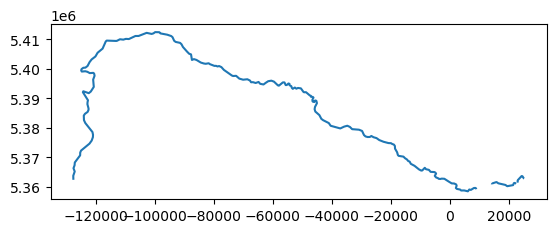

In [75]:
SYSTEM1.plot()

In [90]:
SYSTEM2 = hidrografia.iloc[7:10]

<Axes: >

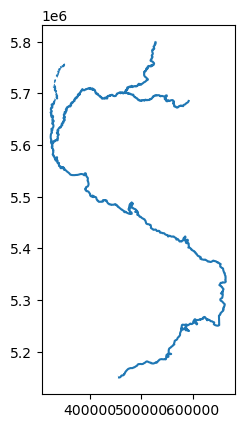

In [91]:
SYSTEM2.plot()

In [94]:
sistemas = SYSTEM1.concat(SYSTEM2, ignore_index=True)

AttributeError: 'GeoDataFrame' object has no attribute 'concat'

In [51]:
hidrografia[~hidrografia.SYSTEM.isna()]

AttributeError: 'GeoDataFrame' object has no attribute 'SYSTEM'

In [47]:
systems=hidrografia.dissolve(by='SYSTEM')
systems

KeyError: 'SYSTEM'